# CLASSIFICATION  - ASSIGNMENT - 2 - "Liver disease"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("liver_disease_1.csv")

In [3]:
data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Total_Bilirubin             583 non-null    float64
 2   Direct_Bilirubin            583 non-null    float64
 3   Alkaline_Phosphotase        583 non-null    int64  
 4   Alamine_Aminotransferase    583 non-null    int64  
 5   Aspartate_Aminotransferase  583 non-null    int64  
 6   Total_Protiens              583 non-null    float64
 7   Albumin                     583 non-null    float64
 8   Albumin_and_Globulin_Ratio  579 non-null    float64
 9   Dataset                     583 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 45.7+ KB


In [5]:
data = pd.get_dummies(data)

In [6]:
data.sum(axis = 0)

Age                            26087.00
Total_Bilirubin                 1923.20
Direct_Bilirubin                 866.40
Alkaline_Phosphotase          169406.00
Alamine_Aminotransferase       47056.00
Aspartate_Aminotransferase     64078.00
Total_Protiens                  3779.70
Albumin                         1831.70
Albumin_and_Globulin_Ratio       548.35
Dataset_No                       167.00
Dataset_Yes                      416.00
dtype: float64

So there are 167 cases with result as "NO" and there are 416 cases with result as "YES"

In [7]:
data = data.drop(columns='Dataset_Yes')

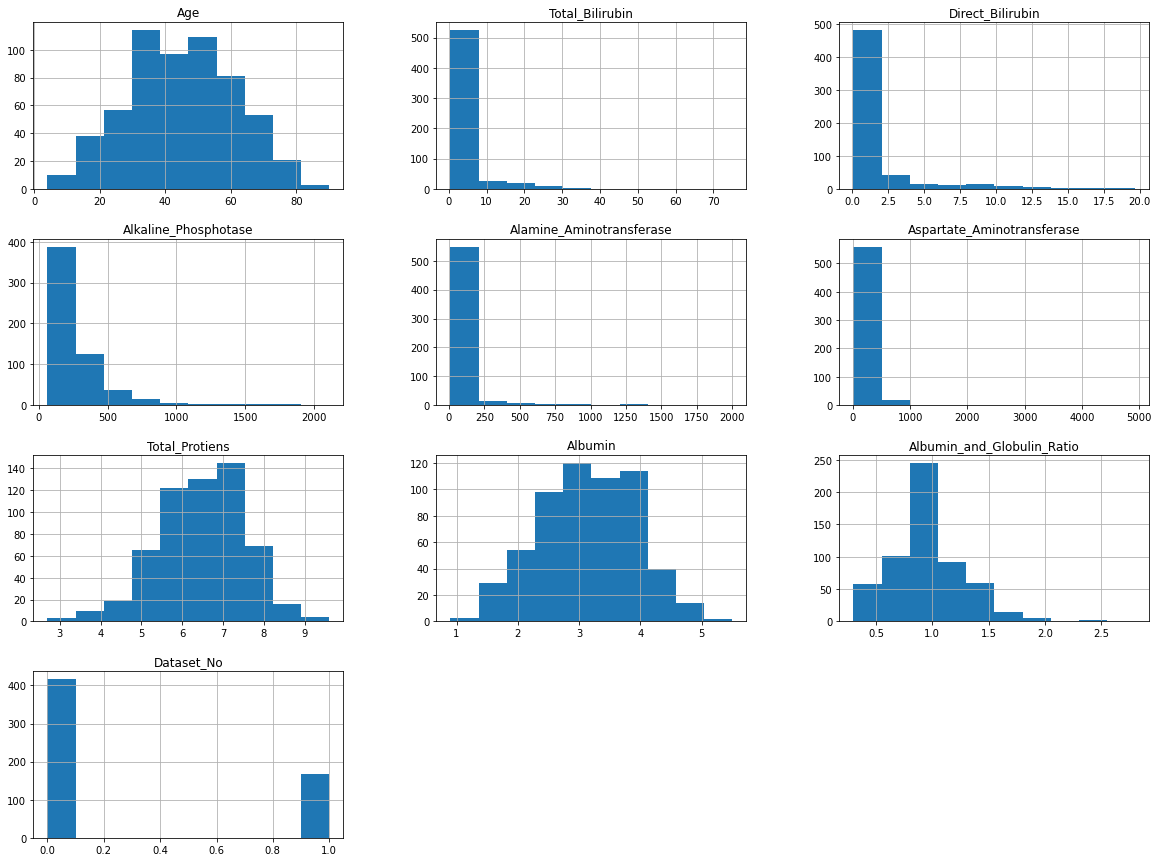

In [8]:
data.hist(figsize=(20, 15))
plt.show()

In [9]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset_No
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,0.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [10]:
data.isna().any().any()

True

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Total_Bilirubin             583 non-null    float64
 2   Direct_Bilirubin            583 non-null    float64
 3   Alkaline_Phosphotase        583 non-null    int64  
 4   Alamine_Aminotransferase    583 non-null    int64  
 5   Aspartate_Aminotransferase  583 non-null    int64  
 6   Total_Protiens              583 non-null    float64
 7   Albumin                     583 non-null    float64
 8   Albumin_and_Globulin_Ratio  579 non-null    float64
 9   Dataset_No                  583 non-null    uint8  
dtypes: float64(5), int64(4), uint8(1)
memory usage: 41.7 KB


In [12]:
data.loc[:, data.isnull().any()].columns

Index(['Albumin_and_Globulin_Ratio'], dtype='object')

In [13]:
sum = data.sum(axis = 0)['Albumin_and_Globulin_Ratio']
sum

548.3499999999999

In [14]:
bool_series = pd.isnull(data['Albumin_and_Globulin_Ratio'])
num = data.shape[0] - bool_series.sum()
num

579

In [15]:
mean = sum/num
mean

0.9470639032815197

In [16]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].replace(np.NaN, mean)

In [17]:
data.isna().any().any()

False

In [18]:
data.loc[:, data.isnull().any()].columns

Index([], dtype='object')

In [19]:
len(data[data.duplicated()])
# total number of duplicate values in the "data"

13

In [20]:
data = data.drop_duplicates()

In [21]:
data.all()
#that means the columns which have false in them have one or more zeros in it or is empty

Age                            True
Total_Bilirubin                True
Direct_Bilirubin               True
Alkaline_Phosphotase           True
Alamine_Aminotransferase       True
Aspartate_Aminotransferase     True
Total_Protiens                 True
Albumin                        True
Albumin_and_Globulin_Ratio     True
Dataset_No                    False
dtype: bool

Although naive bayes is not sensitive to outliers logistic regression is senstive to outliers so dropping them

In [22]:
from scipy import stats
z = np.array(stats.zscore(data))
print(z)
#calculating the z score to check for outliers

[[ 1.24174059 -0.41864741 -0.4937018  ...  0.18973749 -0.15082448
  -0.63556344]
 [ 1.0568741   1.21011064  1.41392328 ...  0.06412731 -0.6536048
  -0.63556344]
 [ 1.0568741   0.63525486  0.91935382 ...  0.18973749 -0.18224825
  -0.63556344]
 ...
 [ 0.4406525  -0.40267919 -0.45837541 ...  0.06412731  0.16341322
  -0.63556344]
 [-0.85341287 -0.32283811 -0.35239624 ...  0.31534768  0.16341322
  -0.63556344]
 [-0.42205774 -0.37074276 -0.42304902 ...  1.57144955  1.73460172
   1.57340705]]


In [23]:
threshold = 3
print(np.where(z > 3))
#if we consider the threshold to be 3 then all values with zscore more than 3 are considered as outliers

(array([ 24,  25,  44,  72, 108, 109, 110, 110, 111, 111, 112, 112, 113,
       113, 114, 114, 121, 128, 128, 128, 151, 155, 157, 157, 183, 187,
       187, 187, 187, 187, 194, 194, 220, 246, 246, 298, 298, 357, 357,
       406, 407, 416, 434, 434, 434, 439, 466, 490, 491, 491, 492, 492,
       496, 506, 506, 518, 518, 533, 534, 534, 535, 546, 546, 552, 552,
       559, 562, 562, 562], dtype=int64), array([4, 4, 4, 3, 3, 3, 4, 5, 4, 5, 4, 5, 1, 2, 1, 2, 3, 3, 4, 5, 3, 1,
       1, 2, 3, 1, 2, 3, 4, 5, 4, 5, 3, 1, 2, 1, 2, 1, 2, 3, 3, 3, 1, 2,
       3, 3, 4, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 8, 1, 2, 1, 2, 8,
       1, 2, 8], dtype=int64))


In [24]:
data = data[(z < 3).all(axis=1)]
#removing all the outliers from the data

<AxesSubplot:>

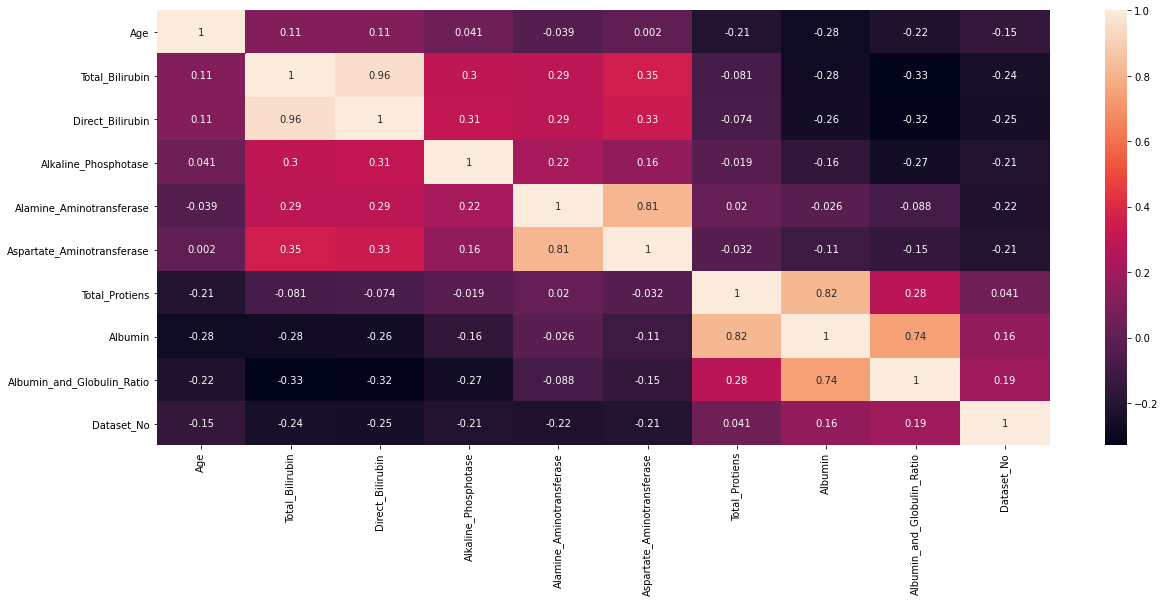

In [25]:
corelation = data.corr()
plt.rcParams['figure.figsize'] = [20,8]
sns.heatmap(corelation,xticklabels = corelation.columns,yticklabels= corelation.columns,annot = True)

In [26]:
x = data.drop('Dataset_No',axis = 1)
y = data['Dataset_No']

In [27]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0, test_size = 0.3)

**GAUSSIAN NAIVE BAYES**

In [29]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(x_train, y_train) 

GaussianNB()

In [30]:
y_pred = gnb.predict(x_test) 

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.5849056603773585

In [32]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
fscore = (f1_score(y_test, y_pred, average="macro"))
precision = (precision_score(y_test, y_pred, average="macro"))
recall = (recall_score(y_test, y_pred, average="macro"))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: 0.653250773993808
recall: 0.6672297297297297
fscore: 0.5835714285714286


In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,51,60,111
1,6,42,48
All,57,102,159


In [34]:
from sklearn.metrics import roc_auc_score
y_pred_proba = gnb.predict_proba(x_test)[:,1]
roc_auc_score(y_test,y_pred_proba)

0.7147147147147146

**BERNOULLI NAIVE BAYES**

In [35]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train,y_train)

BernoulliNB()

In [36]:
y_pred = bnb.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.6666666666666666

In [38]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
fscore = (f1_score(y_test, y_pred, average="macro"))
precision = (precision_score(y_test, y_pred, average="macro"))
recall = (recall_score(y_test, y_pred, average="macro"))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: 0.6471670934699104
recall: 0.6725788288288288
fscore: 0.6441450952240193


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,73,38,111
1,15,33,48
All,88,71,159


In [40]:
from sklearn.metrics import roc_auc_score
y_pred_proba = bnb.predict_proba(x_test)[:,1]
roc_auc_score(y_test,y_pred_proba)

0.7123686186186184

**LOGISTIC REGRESSION**

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [42]:
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [43]:
y_pred = model.predict(x_test)

In [44]:
accuracy_score(y_pred,y_test)

0.7169811320754716

In [45]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
fscore = (f1_score(y_test, y_pred, average="macro"))
precision = (precision_score(y_test, y_pred, average="macro"))
recall = (recall_score(y_test, y_pred, average="macro"))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: 0.6567307692307692
recall: 0.6376689189189189
fscore: 0.6439767129422301


In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,93,18,111
1,27,21,48
All,120,39,159


In [47]:
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(x_test)[:,1]
roc_auc_score(y_test,y_pred_proba)

0.7280405405405406

**SUMMARY**

In [48]:
from tabulate import tabulate
tabulate.PRESERVE_WHITESPACE = True
tabulate.WIDE_CHARS_MODE = False

In [49]:
table = [["accuracy ","0.5849056603773585","0.6666666666666666","0.7169811320754716"],
         ["precision","0.653250773993808","0.6471670934699104","0.6567307692307692"],
        ["recall","0.6672297297297297","0.6725788288288288","0.6376689189189189"],
        ["fscore","0.5835714285714286","0.6441450952240193","0.6439767129422301"],
        [" auc","0.7147147147147146","0.7123686186186184","0.7280405405405406"]]

In [50]:
print(tabulate(table, headers=["------ "," GaussianNB ", "BernoulliNB","LogisticRegression"],tablefmt="simple",numalign="center",colalign=("right",)))

  ------     GaussianNB     BernoulliNB    LogisticRegression
---------  --------------  -------------  --------------------
 accuracy     0.584906       0.666667           0.716981
precision     0.653251       0.647167           0.656731
   recall     0.66723        0.672579           0.637669
   fscore     0.583571       0.644145           0.643977
      auc     0.714715       0.712369           0.728041


Accuracies obtained from Gaussian naive bayes is 0.585 , that obtained from Bernoulli Naive Bayes is 0.66667 and that from logistic regression is 0.72 We can easily infer that the model obtained from logistic regression is much better than that obtained using Naive bayes algorithm